# Sprint3 機械学習スクラッチ 線形回帰

In [334]:
# 最初に使用予定のデータやライブラリーを宣言しておく
import os # ファイルの読み込み先のpath指定する時に必要
import numpy as np # numpyのライブラリー読み込み
import pandas as pd # pandasのライブラリー読み込み
import matplotlib.pyplot as plt # グラフ描写のライブラリー
import matplotlib.patches as mpatches # 可視化
import seaborn as sns # グラフ描写のライブラリー

from sklearn.datasets import load_iris # アイリスデータ
from sklearn.model_selection import train_test_split # データ分割
from sklearn.preprocessing import StandardScaler # 標準化
from sklearn.neighbors import KNeighborsClassifier # 最近傍法
from sklearn.metrics import accuracy_score # 正解率
from sklearn.metrics import precision_score # 適合率
from sklearn.metrics import recall_score # 再現率
from sklearn.metrics import f1_score # F値
from sklearn.metrics import confusion_matrix # 混合行列
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.svm import SVC #SVC 
from sklearn.model_selection import cross_val_score # 決定木
from sklearn.tree import DecisionTreeClassifier # 決定木
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.datasets import make_classification # ランダムフォレスト

from matplotlib.colors import ListedColormap

from sklearn.linear_model import LinearRegression # 線形回帰モデル

### 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。
メソッドの雛形を用意してあります。

In [335]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.theta = 0

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()

        self.theta = np.random.rand(X.shape[1])
#         self._gradient_descent(self, self._linear_hypothesis(self, X), X)
        self._gradient_descent(X, y)

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        y_pred = np.dot(X, self.theta) # 特徴量
        return y_pred

    def _linear_hypothesis(self, X): # リニアハイポセシス
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        linear_hypothesis = np.dot(X, self.theta)
        print(linear_hypothesis.shape)
        return linear_hypothesis

    def _gradient_descent(self, X, y):
        m = len(X)
        alpha = 0.01
        h = self._linear_hypothesis(X)

        gradient = np.dot((h - y), X)
        self.theta = self.theta - alpha/m*gradient
        return self.theta


In [336]:
def _linear_hypothesis(self, X): # リニアハイポセシス
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    #(サンプル数 x 特徴量数) @ (特徴量数 x 1) = (サンプル数 x 1)
    # 公式をそのまま使わない。使うと転置させる必要があるが、あれは考え方。行列席の仕組みを理解する必要がある。
    linear_hypothesis = np.dot(X, self)
#     print(theta)
#     print(theta.shape)
#     print(theta.T)
#     print(theta.T.shape)
#     print(X)
#     print(X.shape)
#     print(linear_hypothesis)
    print(linear_hypothesis.shape)
    return linear_hypothesis


In [337]:
a = np.arange(4).reshape(4,1) # 特徴量4,1
X = np.arange(40).reshape(10,4) # サンプル数10,特徴量4の行列

# print(a.shape)
# print(X.shape)

linear_hypothesis = _linear_hypothesis(a, X)
# linear_hypothesis = ScratchLinearRegression（_linear_hypothesis(a, X))

print(linear_hypothesis)

(10, 1)
[[ 14]
 [ 38]
 [ 62]
 [ 86]
 [110]
 [134]
 [158]
 [182]
 [206]
 [230]]


### 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

In [338]:
def _gradient_descent(self, X, y):
    m = len(X) # サンプル数
    alpha = 0.01 # 学習率
    h = _linear_hypothesis(self, X) # ハイポネシスにて仮定関数を出力

    print("aaaaa")
    print(m)
    print(h)
    print(h.shape)
    print(y.shape)
    print(X.shape)
    print(X.T.shape)

    gradient = np.dot(X.T, (h - y)) # 
    self = self - alpha/m*gradient
    return self

In [339]:
a = np.arange(4).reshape(4,1) # 特徴量4,目的変数1の行列
X = np.arange(40).reshape(10,4) # サンプル数10,特徴量4の行列
y = np.arange(10).reshape(10,1) # サンプル数10,目的変数1の行列

theta = _gradient_descent(a, X, y)

print(theta)
# print(type(theta))
# print(theta)

(10, 1)
aaaaa
10
[[ 14]
 [ 38]
 [ 62]
 [ 86]
 [110]
 [134]
 [158]
 [182]
 [206]
 [230]]
(10, 1)
(10, 1)
(10, 4)
(4, 10)
[[-28.74 ]
 [-28.915]
 [-29.09 ]
 [-29.265]]


### 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数 hθ(x) の出力が推定結果です。

In [340]:
def predict(self, X):
    """
    線形回帰を使い推定する。

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
        サンプル

    Returns
    -------
        次の形のndarray, shape (n_samples, 1)
        線形回帰による推定結果
    """
    y_pred = np.dot(X, self) # Xは最急降下法で求めたもの
    return y_pred

In [341]:
# 確認 np.insert(X, 0, np.ones(X.shape[0]), axis=1)
a = np.arange(4).reshape(4,1)
X = np.arange(40).reshape(10,4)

y_pred = predict(a, X)
print(y_pred)


[[ 14]
 [ 38]
 [ 62]
 [ 86]
 [110]
 [134]
 [158]
 [182]
 [206]
 [230]]


### 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

In [342]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    m = len(y)
    
    lh = _linear_hypothesis(y_pred, X.T)
    mse = 1/m*((lh.T - y)**2)

    return mse

In [343]:
pred = y_pred
y = np.arange(10).reshape(10,1)

print(pred)
print(y)

mse = MSE(pred, y)
print(mse)

[[ 14]
 [ 38]
 [ 62]
 [ 86]
 [110]
 [134]
 [158]
 [182]
 [206]
 [230]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(4, 1)
[[8.92814400e+07 9.67210000e+07 1.04458240e+08 1.12493160e+08]
 [8.92754641e+07 9.67147801e+07 1.04451776e+08 1.12486452e+08]
 [8.92694884e+07 9.67085604e+07 1.04445312e+08 1.12479744e+08]
 [8.92635129e+07 9.67023409e+07 1.04438849e+08 1.12473037e+08]
 [8.92575376e+07 9.66961216e+07 1.04432386e+08 1.12466330e+08]
 [8.92515625e+07 9.66899025e+07 1.04425922e+08 1.12459622e+08]
 [8.92455876e+07 9.66836836e+07 1.04419460e+08 1.12452916e+08]
 [8.92396129e+07 9.66774649e+07 1.04412997e+08 1.12446209e+08]
 [8.92336384e+07 9.66712464e+07 1.04406534e+08 1.12439502e+08]
 [8.92276641e+07 9.66650281e+07 1.04400072e+08 1.12432796e+08]]


### 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

In [344]:
def target_def(self, X, y, theta):
    target = mse/2
#     return target, self.loss, self.val_loss
    return target


In [345]:
a = np.arange(4).reshape(4,1)
X = np.arange(40).reshape(10,4)
y = np.arange(4).reshape(4,1)
theta = np.arange(40).reshape(10,4)

# target, self.loss, self.val_loss = target_def(a, X, y, theta)
target = target_def(a, X, y, theta)
print(target)

[[44640720.   48360500.   52229120.   56246580.  ]
 [44637732.05 48357390.05 52225888.05 56243226.05]
 [44634744.2  48354280.2  52222656.2  56239872.2 ]
 [44631756.45 48351170.45 52219424.45 56236518.45]
 [44628768.8  48348060.8  52216192.8  56233164.8 ]
 [44625781.25 48344951.25 52212961.25 56229811.25]
 [44622793.8  48341841.8  52209729.8  56226457.8 ]
 [44619806.45 48338732.45 52206498.45 56223104.45]
 [44616819.2  48335623.2  52203267.2  56219751.2 ]
 [44613832.05 48332514.05 52200036.05 56216398.05]]


### 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [346]:
# house_price データを取得
os.chdir('../week03')

House_Prices = pd.read_csv('train.csv')
House_Prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [347]:
# house_price を numpy に変更
hp = House_Prices.values
theta = np.random.rand(4, 2) # ランダムな行列データを作成する
print(theta)
print(theta.shape)

[[0.35879745 0.76015295]
 [0.94925038 0.65474382]
 [0.05946987 0.86676869]
 [0.00963531 0.71068529]]
(4, 2)


In [348]:
# 目的変数と特徴量データにスライス
Target = House_Prices["SalePrice"]
X_house = House_Prices.loc[:, ["GrLivArea", "YearBuilt"]]

In [349]:
# データの分割（トラインデータと、テストデータに分割）
X_train, X_test, y_train, y_test = train_test_split(X_house, Target, test_size = 0.25)

In [350]:
# pandas から　numpy に変更
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

In [351]:
# 標準化している（もしくはStandardScalerを使う）
X_train_std = (X_train - X_train.mean()) / X_train.std()
y_train_std = (y_train - y_train.mean()) / y_train.std()

X_test_std = (X_test - X_test.mean()) / X_test.std()
y_test_std = (y_test - y_test.mean()) / y_test.std()

In [352]:
# モデルを使用して学習と推定
lr = LinearRegression()
lr.fit(X_train_std, y_train_std)

y_lr_pred = lr.predict(X_test)
print("切片:", lr.intercept_)
print("パラメータ：", lr.coef_)

切片: -2.7672822339755636
パラメータ： [0.51237008 5.94182675]


In [353]:
slr = ScratchLinearRegression(bias=False, num_iter=1000, lr=0.001, verbose=0)
slr.fit(X_train_std, y_train_std)

y_slr_pred = slr.predict(X_test_std)
print("切片:", slr.theta[0])
print("パラメータ：", slr.theta[1:])

(1095,)
切片: 0.69633155368131
パラメータ： [0.14496831]


### 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

In [354]:
slr.loss[-1]

0.0

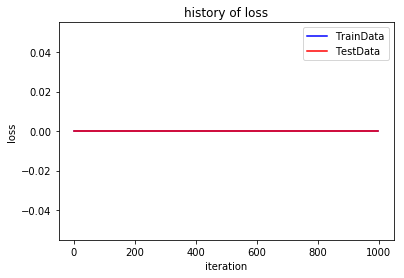

In [355]:
plt.plot(slr.loss, color="blue", label="TrainData")
plt.plot(slr.val_loss, color="red", label="TestData")
plt.title("history of loss")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.legend()

plt.show()

In [358]:
X = np.arange(40).reshape(10,4)

slr._linear_hypothesis(X)


ValueError: shapes (10,4) and (2,) not aligned: 4 (dim 1) != 2 (dim 0)

# *修司は力尽きた。。*